## **Model Training**

**Import Libraries**

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns

**Import Dataset**

In [83]:
df = pd.read_csv("C:\\Users\\Neeta Devke\\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Data Manipulation**
- I do not include the `Duration` column in the dataset, as it s unknown data at the time of the prediction.

In [84]:
df = df.drop('duration', axis = 1)

In [85]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [86]:
df.deposit.unique()

array(['yes', 'no'], dtype=object)

In [87]:
map_deposit = {'yes' : 1, 'no':0}

df['deposit'] = df['deposit'].map(map_deposit)

**Split the Dataset into Independent & Dependent Columns**

In [88]:
X = df.drop('deposit', axis =1)
y = df[['deposit']]

In [89]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown


In [90]:
y.head()

,deposit
0,1
1,1
2,1
3,1
4,1


**Split the Numerical & Categorical Columns**

In [91]:
categorical_columns = X.columns[X.dtypes == 'object']

In [92]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [93]:
numerical_columns = X.columns[X.dtypes != 'object']

In [94]:
numerical_columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [95]:
cat_unique = [df[col].unique() for col in df[categorical_columns]]

In [96]:
cat_unique

[array(['admin.', 'technician', 'services', 'management', 'retired',
        'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
        'unknown', 'self-employed', 'student'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 array(['unknown', 'other', 'failure', 'success'], dtype=object)]

In [97]:
job_categories = ['admin.', 'technician', 'services', 'management', 'retired',
        'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
        'unknown', 'self-employed', 'student']
marital_categories = ['married', 'single', 'divorced']
education_categories = ['secondary', 'tertiary', 'primary', 'unknown']
default_categories = ['no', 'yes']
housing_categories  = ['yes', 'no']
loan_categories = ['no', 'yes']
contact_categories  = ['unknown', 'cellular', 'telephone']
month_categories = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep']
poutcome_categories = ['unknown', 'other', 'failure', 'success']


In [98]:
# Handling the Missing Values
from sklearn.impute import SimpleImputer 

# Handling Feature Scaling
from sklearn.preprocessing import StandardScaler

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [99]:
# Numerical Pipeline

num_pipeline = Pipeline(
    steps =[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# Categorical Pipeline

cat_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehotencoder', OneHotEncoder(categories=[job_categories, marital_categories, education_categories, default_categories,
                                                    housing_categories, loan_categories, 
                                                    contact_categories, month_categories, poutcome_categories])),
        ('scaler', StandardScaler(with_mean=False))
    ]
)


# Combine Two Pipelines
preprocessor = ColumnTransformer([('num_pipeline', num_pipeline, numerical_columns),
                                  ('cat_pipeline', cat_pipeline, categorical_columns)
])

**Train Test Split**

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30,
                                                    random_state = 42)


In [101]:
print(X_train.shape, X_test.shape)

(7813, 15) (3349, 15)


In [102]:
preprocessor.fit_transform(X_train)

array([[ 1.3302546 , -0.18247046, -0.78454148, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61075812, -0.19024459, -0.30944139, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02001512, -0.45456507, -1.73474165, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.52636626, -0.1221432 ,  0.52198376, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82390346, -0.24590738,  1.11585887, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94832555, -0.47726553,  0.87830883, ...,  0.        ,
         0.        ,  0.        ]])

In [103]:
preprocessor.transform(X_test)

array([[ 2.00538946, -0.24652931, -1.25964156, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27319069,  0.02805302,  0.04688368, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52636626,  1.06543315, -0.19066637, ...,  0.        ,
         3.21317662,  0.        ],
       ...,
       [ 0.23316045,  0.12693998, -0.19066637, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16147089, -0.32085001,  0.1656587 , ...,  4.79524448,
         0.        ,  0.        ],
       [-0.52636626, -0.47788747,  0.52198376, ...,  0.        ,
         0.        ,  0.        ]])

In [104]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns = preprocessor.get_feature_names_out())

In [105]:
X_train

,num_pipeline__age,num_pipeline__balance,num_pipeline__day,num_pipeline__campaign,num_pipeline__pdays,num_pipeline__previous,cat_pipeline__job_admin.,cat_pipeline__job_technician,cat_pipeline__job_services,cat_pipeline__job_management,...,cat_pipeline__month_dec,cat_pipeline__month_jan,cat_pipeline__month_feb,cat_pipeline__month_mar,cat_pipeline__month_apr,cat_pipeline__month_sep,cat_pipeline__poutcome_unknown,cat_pipeline__poutcome_other,cat_pipeline__poutcome_failure,cat_pipeline__poutcome_success
0,1.330255,-0.182470,-0.784541,-0.550775,-0.472571,-0.375762,0.0,2.718149,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000
1,-0.610758,-0.190245,-0.309441,-0.550775,-0.472571,-0.375762,0.0,2.718149,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,3.696981,0.0,2.312666,0.0,0.0,0.000000
2,-0.020015,-0.454565,-1.734742,2.387568,-0.472571,-0.375762,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000
3,0.401944,0.894713,0.284434,1.652982,-0.472571,-0.375762,0.0,2.718149,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000
4,-1.117109,0.910572,1.472184,-0.550775,-0.472571,-0.375762,0.0,0.000000,0.0,0.000000,...,0.0,6.085489,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,0.486336,-0.241243,-0.546991,-0.183482,-0.472571,-0.375762,0.0,0.000000,0.0,2.366155,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000
7809,-1.117109,-0.428444,0.046884,-0.183482,-0.157231,1.497772,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.415074
7810,-0.526366,-0.122143,0.521984,3.856739,-0.472571,-0.375762,0.0,2.718149,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000
7811,0.823903,-0.245907,1.115859,0.918397,-0.472571,-0.375762,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.312666,0.0,0.0,0.000000


In [106]:
X_test = pd.DataFrame(preprocessor.transform(X_test), columns = preprocessor.get_feature_names_out())

In [107]:
X_test

,num_pipeline__age,num_pipeline__balance,num_pipeline__day,num_pipeline__campaign,num_pipeline__pdays,num_pipeline__previous,cat_pipeline__job_admin.,cat_pipeline__job_technician,cat_pipeline__job_services,cat_pipeline__job_management,...,cat_pipeline__month_dec,cat_pipeline__month_jan,cat_pipeline__month_feb,cat_pipeline__month_mar,cat_pipeline__month_apr,cat_pipeline__month_sep,cat_pipeline__poutcome_unknown,cat_pipeline__poutcome_other,cat_pipeline__poutcome_failure,cat_pipeline__poutcome_success
0,2.005389,-0.246529,-1.259642,-0.550775,-0.472571,-0.375762,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
1,-0.273191,0.028053,0.046884,2.387568,-0.472571,-0.375762,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
2,-0.526366,1.065433,-0.190666,-0.550775,2.319118,0.092622,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.213177,0.0
3,0.486336,2.081046,-0.903316,-0.183482,-0.472571,-0.375762,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
4,-0.526366,-0.019836,-0.428216,0.183811,-0.472571,-0.375762,0.0,2.718149,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,-0.948326,-0.323960,0.640759,-0.550775,-0.472571,-0.375762,0.0,0.000000,3.625953,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
3345,0.233160,-0.474156,0.403209,-0.183482,-0.472571,-0.375762,0.0,0.000000,0.000000,2.366155,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
3346,0.233160,0.126940,-0.190666,-0.550775,-0.472571,-0.375762,0.0,0.000000,0.000000,2.366155,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.312666,0.000000,0.000000,0.0
3347,1.161471,-0.320850,0.165659,-0.550775,2.467514,0.092622,0.0,0.000000,0.000000,2.366155,...,0.0,0.0,0.0,0.0,3.696981,0.0,0.000000,4.795244,0.000000,0.0


**Model Training**

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [129]:
logregr = LogisticRegression()
logregr.fit(X_train, y_train)

d:\Bank_Marketing_Analysis\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [130]:
logregr.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [136]:
def evaluate_model(true, predicted):
    classification_report1 = classification_report(true, predicted)
    confusion_matrix1 = confusion_matrix(true, predicted)
    accuracy_score1 = accuracy_score(true, predicted) * 100
    f1_score1 = f1_score(true, predicted) * 100
    heatmap = sns.heatmap(confusion_matrix1, annot = True)
    return classification_report1, confusion_matrix1, accuracy_score1, f1_score1, heatmap

d:\Bank_Marketing_Analysis\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression
Model Training Performance
classification_report:               precision    recall  f1-score   support

           0       0.68      0.84      0.75      1742
           1       0.77      0.58      0.66      1607

    accuracy                           0.71      3349
   macro avg       0.73      0.71      0.71      3349
weighted avg       0.73      0.71      0.71      3349

Accuracy_score: 71.48402508211407
Confusion_matrix: [[1468  274]
 [ 681  926]]
F1_score: 65.97791236195225
Heatmap: Axes(0.125,0.11;0.62x0.77)
***********************************




C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_9436\3281481354.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier
Model Training Performance
classification_report:               precision    recall  f1-score   support

           0       0.70      0.87      0.78      1742
           1       0.81      0.60      0.69      1607

    accuracy                           0.74      3349
   macro avg       0.75      0.73      0.73      3349
weighted avg       0.75      0.74      0.73      3349

Accuracy_score: 73.93251716930426
Confusion_matrix: [[1511  231]
 [ 642  965]]
F1_score: 68.85479843025331
Heatmap: Axes(0.125,0.11;0.496x0.77)
***********************************


NaiveBayes
Model Training Performance
classification_report:               precision    recall  f1-score   support

           0       0.66      0.85      0.74      1742
           1       0.76      0.52      0.62      1607

    accuracy                           0.69      3349
   macro avg       0.71      0.68      0.68      3349
weighted avg       0.71      0.69      0.68      3349

Accuracy_score: 69.03553299492

d:\Bank_Marketing_Analysis\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTree
Model Training Performance
classification_report:               precision    recall  f1-score   support

           0       0.67      0.87      0.76      1742
           1       0.79      0.53      0.64      1607

    accuracy                           0.71      3349
   macro avg       0.73      0.70      0.70      3349
weighted avg       0.73      0.71      0.70      3349

Accuracy_score: 70.7972529113168
Confusion_matrix: [[1512  230]
 [ 748  859]]
F1_score: 63.72403560830862
Heatmap: Axes(0.125,0.11;0.31744x0.77)
***********************************




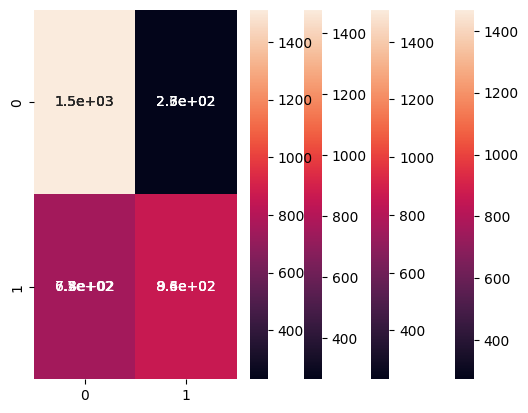

In [137]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100, max_depth = 12, random_state = 42),
    "NaiveBayes" : GaussianNB(),
    "DecisionTree" : DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
}

trained_model_list = []
model_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # Make Prediction
    y_pred = model.predict(X_test)
    
    
    classification_report1, confusion_matrix1, accuracy_score1, f1_score1, heatmap = evaluate_model(y_test, y_pred)
    
    print(list(models.keys())[i])
    
    model_list.append(list(models.keys())[i])
    
    print('Model Training Performance')
    print('classification_report:',classification_report1)
    print("Accuracy_score:", accuracy_score1)
    print('Confusion_matrix:', confusion_matrix1)
    print("F1_score:", f1_score1)
    print("Heatmap:", heatmap)
    
    f1_list.append(f1_score1)
    
    
    print("*"*35)
    print('\n')

In [138]:
model_list

['LogisticRegression', 'RandomForestClassifier', 'NaiveBayes', 'DecisionTree']